### Задача 1. Numpy (15 баллов)

**3.1 (Вспоминаем, что такое numpy)** (3 балла)

$ 1.$ (1 б.)

Создайте с помощью np.random.randint numpy массив из 20-ти рандомных чисел.
Посчитайте с помощью методов numpy и выведите на экран:

* среднее значение в массиве
* минимальное значение в массиве
* максимальное значение в массиве
* индекс минимального элемента в массиве


$ 2.$ (1 б.)Создайте два numpy массива: в первом должны быть четные числа от 2 до 14 включительно, а во втором — числа 7, 11, 17, 18, 23, 30, 45.

* Сложите массивы и возведите элементы получившегося массива в квадрат
* Выведите все элементы из первого массива, которые стоят на тех местах, где элементы второго массива больше 12 и дают остаток 3 при делении на 5.
* Для первого массива найдите остатки от деления на 2, а для второго — на 3.


$ 3.$ (1 б.)
1. Сгенерируйте рандомный массив b размера 3x1.
2. Сгенерируйте матрицу С размера 3x3.
3. Решите систему Cx = b с помощью numpy.linalg.solve
4. Подумайте/погуглите, в каком случае numpy.linalg.solve вернет ошибку LinAlgError. Воспроизведите этот случай.

In [1]:
import numpy as np
import time # понадобится для замера времени в следующих пунктах

**3.2 (12 баллов)**

Сравните производительность операций умножения матриц с использованием библиотеки NumPy и стандартных списков Python для матриц размером от 2x2 до 100x100.

1. Сгенерируйте две матрицы A и B случайного размера от nxn, заполненные случайными целыми числами от 1 до 50. **(1 балл)**
2. Используя библиотеку NumPy, выполните умножение матриц A и B. Измерьте время выполнения операции. **(1 балл)**
3. Реализуйте функцию для умножения матриц с помощью стандартных списков Python. Измерьте время выполнения этой операции.  **(2 балла)**
4. Сделайте вышеперечисленные пункты для n=2,...100. **(3 балла)**
5. Для какого-нибудь n проверьте, что результаты умножения (получившаяся матрица) совпадают. **(1 балл)**


6. Постройте график, где по оси X будет размер матрицы, по оси Y - время выполнения операции. Постройте два графика (для numpy и для стандартных списков)  **(4 балла)**
Сделайте выводы.


In [3]:
n = np.random.randint(2, 101)
A = np.random.randint(1, 51, size=(n, n))
B = np.random.randint(1, 51, size=(n, n))
print(A)
print(B)


[[42 36 46 ... 49 18 38]
 [26 29 48 ... 30 20  5]
 [ 5 11 47 ... 16 49 50]
 ...
 [20 16 24 ...  4 33 18]
 [15 15 21 ... 24  4  7]
 [ 4 42  8 ...  6 43 28]]
[[ 7 42 50 ... 29 29 50]
 [23 41  9 ... 28 28 21]
 [17  8 40 ... 37 11 23]
 ...
 [26 36 28 ... 17 27  6]
 [24 48 30 ... 25 25 11]
 [ 9 41 28 ...  4 36 11]]


In [5]:
start_time = time.time()
result = np.dot(A, B)
time_taken = time.time() - start_time
print(result)
print("Операция заняла:", time_taken)

[[25429 26992 27361 ... 26419 26334 22324]
 [23144 23567 22022 ... 23811 20511 20432]
 [22885 23654 23543 ... 22337 20375 18435]
 ...
 [22547 22504 21081 ... 21080 20720 19119]
 [22876 22336 19816 ... 22600 21359 18748]
 [26970 28492 24854 ... 25809 25395 22609]]
Операция заняла: 0.000995635986328125


In [7]:
def multiply_list(a, b):
    m = len(a)
    res = [[0 for _ in range(m)] for _ in range(m)]
    for i in range(m):
        for j in range(m):
            for k in range(m):
                res[i][j] += a[i][k] * b[k][j]
    return res


A_new = A.tolist()
B_new = B.tolist()
start_time = time.time()
result = multiply_list(A_new, B_new)
time_taken = time.time() - start_time

print(result)
print("Операция заняла:", time_taken)


[[25429, 26992, 27361, 26325, 26061, 27577, 22290, 24986, 23468, 26980, 22771, 24800, 27930, 28381, 23731, 22493, 34836, 28380, 25839, 21937, 28343, 28869, 34332, 24802, 30198, 29356, 24273, 29128, 29174, 31847, 26419, 26334, 22324], [23144, 23567, 22022, 22680, 24684, 20938, 19967, 18104, 22585, 20459, 18888, 23218, 25774, 27468, 21209, 18960, 30539, 23236, 24937, 19222, 25186, 26820, 27332, 21410, 28663, 25072, 18191, 28604, 24171, 25413, 23811, 20511, 20432], [22885, 23654, 23543, 19561, 21751, 22568, 20360, 19804, 24063, 21521, 18341, 21739, 22436, 25193, 19641, 19761, 30825, 23523, 22589, 18732, 24576, 24879, 28561, 20103, 26828, 23748, 21204, 26170, 23414, 23063, 22337, 20375, 18435], [29596, 29819, 28033, 27274, 28939, 29324, 25411, 24230, 23846, 26991, 22905, 26648, 27172, 28382, 25150, 23854, 36545, 29797, 25332, 25311, 30699, 30707, 32793, 24511, 31611, 30648, 24640, 28517, 27035, 33720, 26865, 24889, 22374], [26488, 26412, 25501, 24498, 24936, 25875, 22101, 24741, 24231, 240

### Задача 2. Pandas. EDA (35 баллов)

Вам предлагает проанализировать датасет с Data - вакансиями. Скачайте его https://disk.yandex.ru/d/QUa3pCKVk48cAQ и считайте с помощью pd.read_csv.

0. Выведите первые 5 строк датасете. Примените к датасету методы info и describe **(1)**
1. Сколько в датасете строк и столбцов? **(1)**
2. Есть ли в датасете пропуски? **(1)**
3. Есть в датасете полные дубли? Если да, удалите их. **(1)**
4. Сколько уникальных значений у переменной professional_roles? **(1)**
5. Сколько в датасете вакансий, не требующих опыта? (**2**)
6. Какое среднее количество навыков в вакансии? (переменная key_skills) **(2)**
7. Какие валюты (ключ currency в поле salary) используются для заработной платы? Создайте столбец currency. **(2)**
8. Какая компания лидирует по количеству вакансий? **(2)**
9.  Какая компания лидирует по количеству вакансий с указанием заработной платы? **(2)**
10. Создайте столбец salary_num. Рассчитайте его, используя столбец salary. Если в это столбце указана вилка зарплаты, используйте среднее значение между from и to.  **(2)**
11. Создайте столбец is_python_requirement, который принимает значение 1, если в key_skills присутствует python (учитывайте написание в любом регистре).  Какой процент вакансий требует знания python? **(2)**
12. Сгруппируйте по столбцам experience, schedule, employment, is_python_requirement. Найдите по каждой группе количество опубликованных вакансий, среднюю заработную плату среди вакансий с указанием зарплаты в рублях, количество компаний, которые опубликовали вакансии.  **(3)**
13. Сделайте сводную таблицу (pd.pivot_table) по компаниям: название компании, количество вакансий, средняя заработная плата среди вакансий с указанием зарплаты в рублях. **(3)**
14. Какие скиллы чаще всего требуются? Выведите топ-10 требуемых скиллов. **(3)**
15. Постройте гистограмму распределения зарплаты среди вакансий в рублях.  **(2)**
16. Постройте boxplot зарплаты (среди вакансий в рублях) с группировкой по полю experience **(2)**
17. Попробуйте ответить на какой-нибудь вопрос по данным, не заданный ранее. Никак не ограничиваем вашу фантазию **(3)**

In [64]:
import pandas as pd
df = pd.read_csv('vacancies.csv')

In [65]:
df.head(5)

,Unnamed: 0,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills
0,0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[]
1,1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[]
2,2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe..."
3,3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[]
4,4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']"


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1527 non-null   int64 
 1   position_name       1527 non-null   object
 2   employer_name       1527 non-null   object
 3   area                1527 non-null   object
 4   experience          1527 non-null   object
 5   schedule            1527 non-null   object
 6   employment          1527 non-null   object
 7   professional_roles  1527 non-null   object
 8   salary              220 non-null    object
 9   description         1527 non-null   object
 10  key_skills          1527 non-null   object
dtypes: int64(1), object(10)
memory usage: 131.4+ KB


In [69]:
df.describe()

,Unnamed: 0
count,1527.000000
mean,763.000000
std,440.951244
min,0.000000
25%,381.500000
50%,763.000000
75%,1144.500000
max,1526.000000


In [71]:
df.shape

(1527, 11)

Ответ: 1527 строк и 11 столбцов

In [72]:
df.isnull().sum()

Unnamed: 0               0
position_name            0
employer_name            0
area                     0
experience               0
schedule                 0
employment               0
professional_roles       0
salary                1307
description              0
key_skills               0
dtype: int64

In [75]:
df.duplicated().sum()

0

Ответ: дублей нет -- соответственно не удаляем

In [77]:
unique_roles_count = df['professional_roles'].nunique()
unique_roles_count

36

Ответ: 36 уникальных значений

In [78]:
vac = df[df['experience'] == 'Нет опыта'].shape
vac

(136, 11)

Ответ: 136 вакансий

In [83]:
avg_ = df['key_skills'].apply(lambda x: len(x.split(',')) if pd.notna(x) and x != '[]' else 0).mean()
avg_

3.8788474132285526

Ответ: 4 навыка

In [82]:
df.head()

,Unnamed: 0,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills,key_skills_count
0,0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[],0
1,1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[],0
2,2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe...",11
3,3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[],0
4,4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']",2


In [87]:
df['currency'] = df['salary'].apply(lambda x: eval(x).get('currency') if pd.notna(x) and 'currency' in x else None)

print("Список валют:", df['currency'].unique())

Список валют: ['RUR' 'KZT' None 'UZS' 'USD' 'EUR' 'BYR']


In [88]:
df.head()

,Unnamed: 0,position_name,employer_name,area,experience,schedule,employment,professional_roles,salary,description,key_skills,key_skills_count,currency
0,0,Data Scientist Авито,Changellenge,Москва,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 255000, 'to': 490000, 'currency': 'RU...",<p>В наших командах разрабатывают эффективные ...,[],0,RUR
1,1,Data analyst,Публичная Компания «Freedom Finance Global PLC»,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,"BI-аналитик, аналитик данных","{'from': 800000, 'to': 'null', 'currency': 'KZ...",<p><strong>Обязанности</strong></p><ul><li>Изв...,[],0,KZT
2,2,Data Engineer/Data Analyst,IMANTECH,Ташкент,Нет опыта,Гибкий график,Полная занятость,"BI-аналитик, аналитик данных",NaN,<p><strong>About Us:</strong> Welcome to <stro...,"['SQL', 'Визуализация данных', 'Python', 'Powe...",11,None
3,3,Стажер в направление Big Data,T2,Москва,Нет опыта,Полный день,Полная занятость,"BI-аналитик, аналитик данных",NaN,<strong>Что нужно делать:</strong> <ul> <li>Со...,[],0,None
4,4,Data Marketing Manager / Маркетолог по анализу...,Procter & Gamble,Алматы,От 1 года до 3 лет,Полный день,Полная занятость,Другое,"{'from': 950000, 'to': 'null', 'currency': 'KZ...",<p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...,"['Английский язык', 'Аналитический склад ума']",2,KZT


In [89]:
df['employer_name'].value_counts()


employer_name
СБЕР                                                                    146
Aston                                                                    70
Т-Банк                                                                   56
EPAM Uzbekistan                                                          46
Газпромбанк                                                              30
                                                                       ... 
Clear Mind                                                                1
X5 Digital                                                                1
Московская Биржа                                                          1
Отраслевой центр разработки и внедрения информационных систем / ОЦРВ      1
Autodoc Group (Автодок Казахстан)                                         1
Name: count, Length: 524, dtype: int64

Ответ: лидирует компания Сбер

In [90]:
df[df['salary'].notna()]['employer_name'].value_counts()

employer_name
Aston                          29
Changellenge                    7
Алабуга, ОЭЗ ППТ                7
СБЕР                            5
Rubbles                         5
                               ..
ФГАНУ НИИ Спецвузавтоматика     1
QIC                             1
Анвио Парк                      1
HR IMPLANT                      1
HeadHunter                      1
Name: count, Length: 130, dtype: int64

Ответ: лидирует компания Aston

### Задача 3. Ещё pandas и EDA (30 баллов)

Используем датасет: https://disk.yandex.ru/d/yv2Tx1nYiIFf-A

Cкачайте и считайте его с помощью pd.read_csv.

**Список столбцов:**  
item_id - id товара  
product_category_name - id категории  
month_year - первое число месяца, за который взяты данные  
qty - количество  
total_price - суммарная стоимость  
unit_price - цена  
product_name_lenght  
product_description_lenght  
holiday - количество праздников в месяце  
volume - объем  
comp_price - цена у одного из конкурентов  

In [10]:
import pandas as pd
df = pd.read_csv('items.csv')

0. Посмотрите на датасет, выведите первые пять строк и список столбцов **(0.1)**
1. Сколько в датасете строк и столбцов? **(0.4)**
2. Есть ли пропуски?  **(0.5)**
3. Есть ли в датасете полные дубли? Если да, удалите их.  **(1)**
4. Выведите описательные статистики по переменным.  **(1)**
5. Используя pd.to_datetime, приведите столбец month_year к дате.  **(1)**
6. Создайте столбцы year и month. **(1)**
7. Какой период времени покрывается данными?   **(1)**
8. Сколько в датасете товаров? Сколько категорий?   **(1)**
9. Создайте столбец category_median_price, который будет содержать медианную цену категории (у строк с одним значением product_category_name) будет одно значение этого столбца. **(2)**
10. Есть ли в датасете аномальные значения полей qty, unit_price,	total_price? **(2)**
11. В какой категории самая высокая средняя цена товара? **(2)**
12. Постройте scatter plot зависимости спроса (qty) от цены (unit price) **(1)**.
    Напишите функцию, которая принимает на вход датасет, названия столбцов, название графика и осей и рисует scatter plot.
    Нариcуйте все scatter plot от числовых переменных. **(1)**
13. Сделайте поле lag_price - цена в предыдущем месяце. Если ее нет, оставьте поле пустым. **(2)**
14. Создайте поле is_price_up, которое принимает значение 1, если цена выросла по сравнению с предыдущим месяцем. **(2)**
15. Постройте тепловую карту корреляций переменных. Сделайте выводы. **(2)**
16. Постройте таблицу, где по столбцам название товаров, а по строкам - дата (месяц-год). В ячейках должно быть количество проданного товара. **(3)**
17. Продажи каких товаров коррелируют между собой? **(3)**
18. Попробуйте ответить на какой-нибудь вопрос по данным, не заданный ранее. Никак не ограничиваем вашу фантазию **(3)**

In [11]:
df.head(5)

,Unnamed: 0,item_id,product_category_name,month_year,qty,total_price,unit_price,product_name_lenght,product_description_lenght,customers,holiday,volume,comp_price
0,0,bed1,bed_bath_table,01-05-2017,1,45.95,45.95,39,161,57,1,3800,45.95
1,1,bed1,bed_bath_table,01-06-2017,3,137.85,45.95,39,161,61,1,3800,45.95
2,2,bed1,bed_bath_table,01-07-2017,6,275.70,45.95,39,161,123,1,3800,45.95
3,3,bed1,bed_bath_table,01-08-2017,4,183.80,45.95,39,161,90,1,3800,45.95
4,4,bed1,bed_bath_table,01-09-2017,2,91.90,45.95,39,161,54,1,3800,45.95


In [12]:
df.columns

Index(['Unnamed: 0', 'item_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'customers', 'holiday', 'volume',
       'comp_price'],
      dtype='object')

In [13]:
df.shape

(676, 13)

In [14]:
df.isnull().sum()

Unnamed: 0                    0
item_id                       0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
customers                     0
holiday                       0
volume                        0
comp_price                    0
dtype: int64

In [15]:
df.duplicated().sum()

0

Ответ: дублей нет -- соответственно не удаляем

In [16]:
df.describe()

,Unnamed: 0,qty,total_price,unit_price,product_name_lenght,product_description_lenght,customers,holiday,volume,comp_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,337.500000,14.495562,1422.708728,106.496800,48.720414,767.399408,81.028107,1.494083,10664.627219,84.182642
std,195.288675,15.443421,1700.123100,76.182972,9.420715,655.205015,62.055560,0.940430,9172.801850,47.745789
min,0.000000,1.000000,19.900000,19.900000,29.000000,100.000000,1.000000,0.000000,640.000000,19.900000
25%,168.750000,4.000000,333.700000,53.900000,40.000000,339.000000,34.000000,1.000000,3510.000000,53.785714
50%,337.500000,10.000000,807.890000,89.900000,51.000000,501.000000,62.000000,1.000000,8000.000000,59.900000
75%,506.250000,18.000000,1887.322500,129.990000,57.000000,903.000000,116.000000,2.000000,15750.000000,99.990000
max,675.000000,122.000000,12095.000000,364.000000,60.000000,3006.000000,339.000000,4.000000,32736.000000,255.610000


In [18]:
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')
df.head()

,Unnamed: 0,item_id,product_category_name,month_year,qty,total_price,unit_price,product_name_lenght,product_description_lenght,customers,holiday,volume,comp_price
0,0,bed1,bed_bath_table,2017-05-01,1,45.95,45.95,39,161,57,1,3800,45.95
1,1,bed1,bed_bath_table,2017-06-01,3,137.85,45.95,39,161,61,1,3800,45.95
2,2,bed1,bed_bath_table,2017-07-01,6,275.70,45.95,39,161,123,1,3800,45.95
3,3,bed1,bed_bath_table,2017-08-01,4,183.80,45.95,39,161,90,1,3800,45.95
4,4,bed1,bed_bath_table,2017-09-01,2,91.90,45.95,39,161,54,1,3800,45.95


In [19]:
df['year'] = df['month_year'].dt.year
df['month'] = df['month_year'].dt.month
df.head()

,Unnamed: 0,item_id,product_category_name,month_year,qty,total_price,unit_price,product_name_lenght,product_description_lenght,customers,holiday,volume,comp_price,year,month
0,0,bed1,bed_bath_table,2017-05-01,1,45.95,45.95,39,161,57,1,3800,45.95,2017,5
1,1,bed1,bed_bath_table,2017-06-01,3,137.85,45.95,39,161,61,1,3800,45.95,2017,6
2,2,bed1,bed_bath_table,2017-07-01,6,275.70,45.95,39,161,123,1,3800,45.95,2017,7
3,3,bed1,bed_bath_table,2017-08-01,4,183.80,45.95,39,161,90,1,3800,45.95,2017,8
4,4,bed1,bed_bath_table,2017-09-01,2,91.90,45.95,39,161,54,1,3800,45.95,2017,9


In [20]:
print(df['month_year'].min(), df['month_year'].max())

2017-01-01 00:00:00 2018-08-01 00:00:00


Ответ: с января 2017 по август 2018

In [23]:
print(df['item_id'].nunique(), df['product_category_name'].nunique())

52 9


Ответ: 52 товара, 9 категорий

In [25]:
df['category_median_price'] = df.groupby('product_category_name')['unit_price'].transform('median')
df.sample(10)

,Unnamed: 0,item_id,product_category_name,month_year,qty,total_price,unit_price,product_name_lenght,product_description_lenght,customers,holiday,volume,comp_price,year,month,category_median_price
603,603,watches7,watches_gifts,2017-10-01,10,3461.58,346.158000,46,501,43,2,3042,232.49,2017,10,150.133333
432,432,garden3,garden_tools,2018-03-01,6,680.00,113.333333,47,1893,116,1,8000,53.90,2018,3,59.900000
234,234,health1,health_beauty,2018-03-01,4,339.96,84.990000,49,1495,169,1,8151,58.99,2018,3,79.990000
47,47,garden7,garden_tools,2017-10-01,11,658.90,59.900000,57,339,146,2,32560,59.90,2017,10,59.900000
208,208,health10,health_beauty,2018-05-01,33,1723.08,52.069286,40,409,159,3,3762,58.99,2018,5,79.990000
477,477,watches4,watches_gifts,2018-07-01,8,840.00,105.000000,58,3006,122,1,7632,155.00,2018,7,150.133333
180,180,computers6,computers_accessories,2018-07-01,13,1948.70,149.900000,48,894,43,1,4840,77.90,2018,7,119.990000
315,315,computers1,computers_accessories,2017-06-01,6,611.40,100.900000,45,236,15,1,2808,100.90,2017,6,119.990000
518,518,garden2,garden_tools,2018-03-01,2,107.80,53.900000,59,341,116,1,32560,53.90,2018,3,59.900000
57,57,garden7,garden_tools,2018-08-01,7,349.30,49.900000,57,339,46,1,32560,49.90,2018,8,59.900000


In [26]:
category_price_mean = df.groupby('product_category_name')['unit_price'].mean()
category_price_mean

product_category_name
bed_bath_table            78.629278
computers_accessories    119.482323
consoles_games            27.033766
cool_stuff               107.857512
furniture_decor           60.154262
garden_tools              80.094699
health_beauty            132.309870
perfumery                 89.348813
watches_gifts            164.880007
Name: unit_price, dtype: float64

Ответ: категория с самой высокой средней ценой товара -- watches_gifts

12. Постройте scatter plot зависимости спроса (qty) от цены (unit price) **(1)**.
    Напишите функцию, которая принимает на вход датасет, названия столбцов, название графика и осей и рисует scatter plot.
    Нариcуйте все scatter plot от числовых переменных. **(1)**
13. Сделайте поле lag_price - цена в предыдущем месяце. Если ее нет, оставьте поле пустым. **(2)**
14. Создайте поле is_price_up, которое принимает значение 1, если цена выросла по сравнению с предыдущим месяцем. **(2)**
15. Постройте тепловую карту корреляций переменных. Сделайте выводы. **(2)**
16. Постройте таблицу, где по столбцам название товаров, а по строкам - дата (месяц-год). В ячейках должно быть количество проданного товара. **(3)**
17. Продажи каких товаров коррелируют между собой? **(3)**
18. Попробуйте ответить на какой-нибудь вопрос по данным, не заданный ранее. Никак не ограничиваем вашу фантазию **(3)**

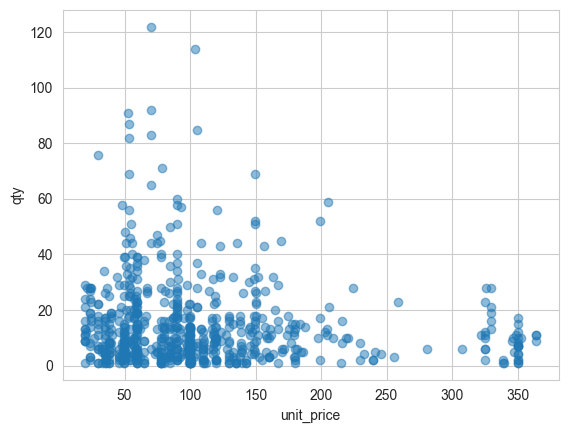

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df['unit_price'], df['qty'], alpha=0.5)
plt.xlabel('unit_price')
plt.ylabel('qty')
plt.show()


Следующее задание пытался сделать, чтоб графики хотя бы по 3-4 в ряд были, но не получилось :(

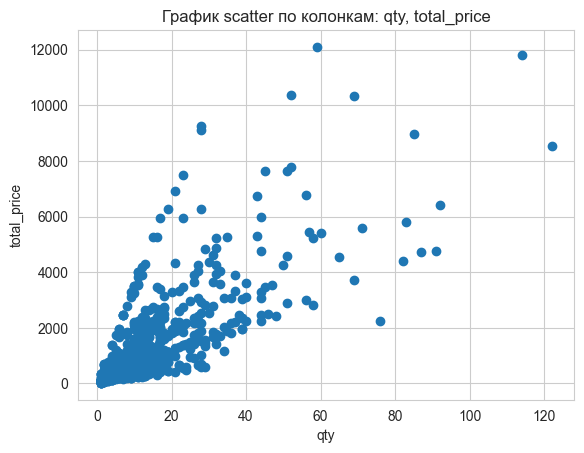

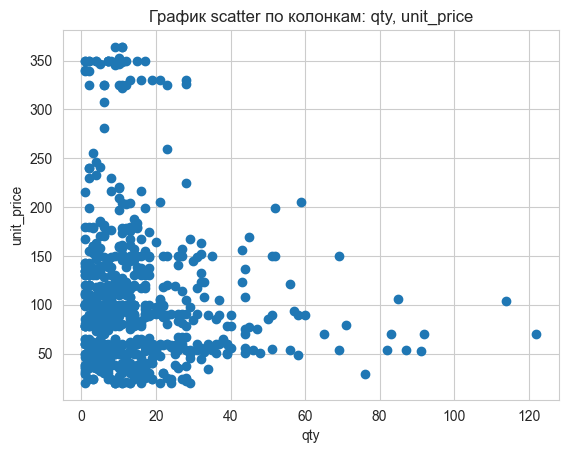

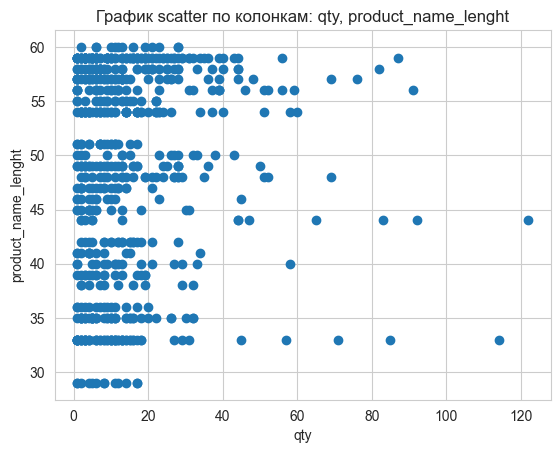

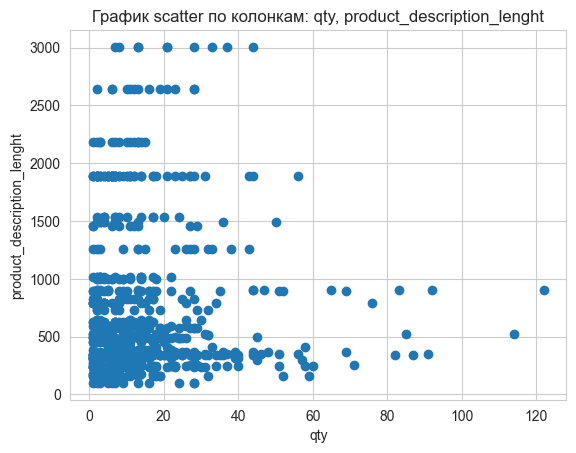

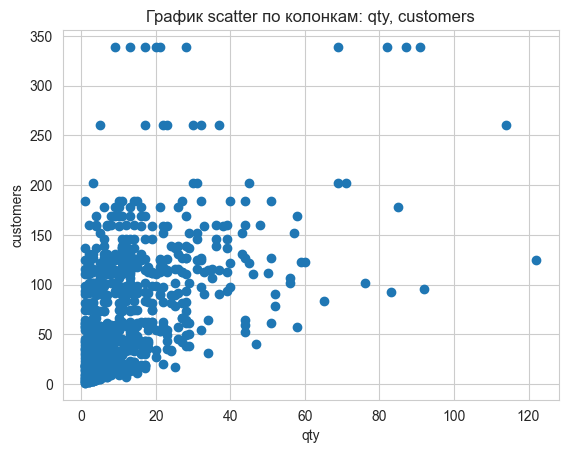

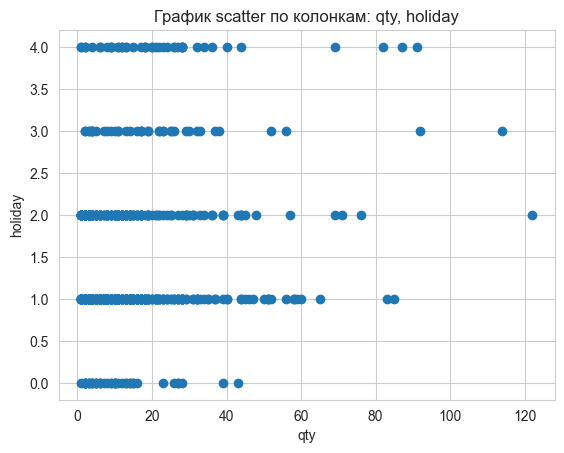

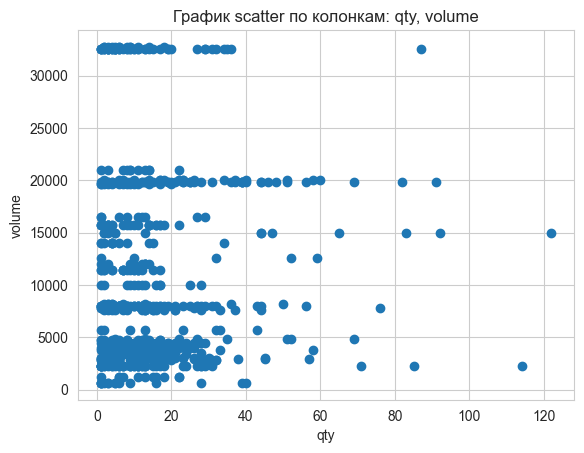

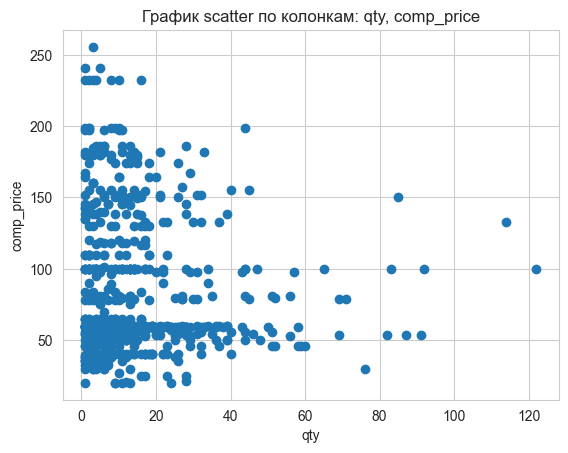

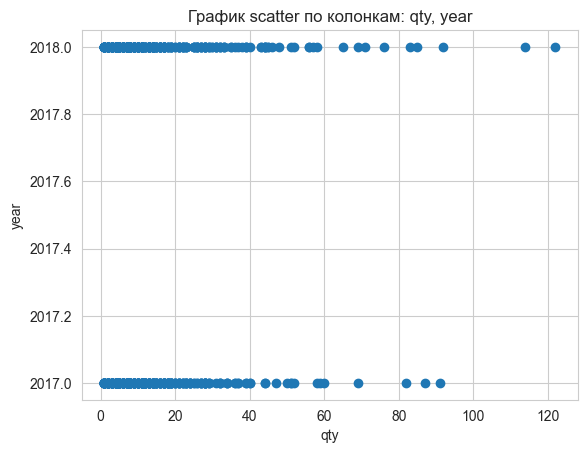

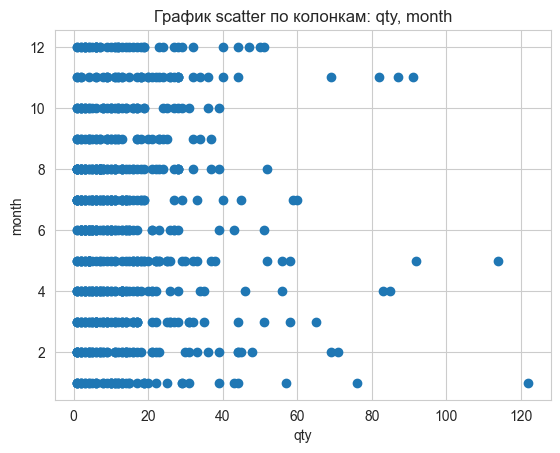

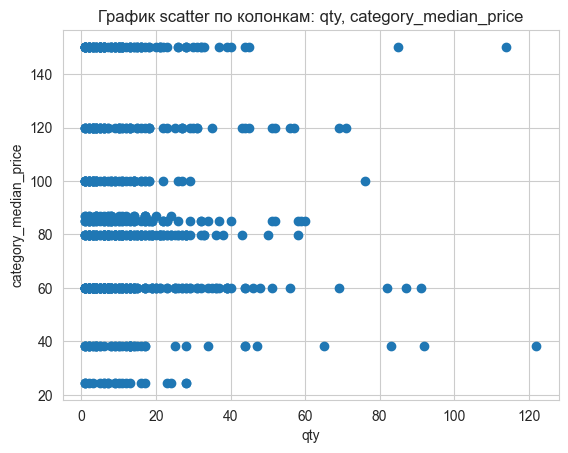

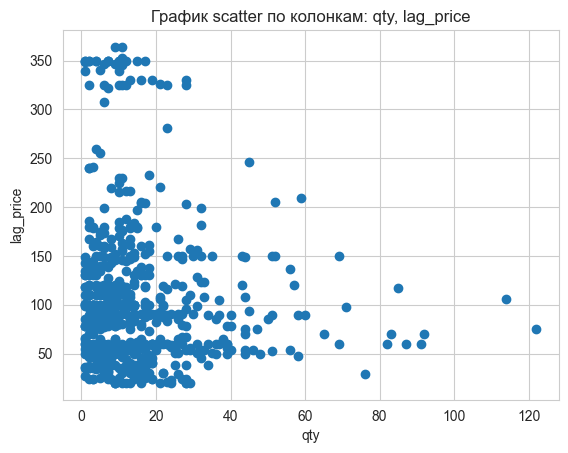

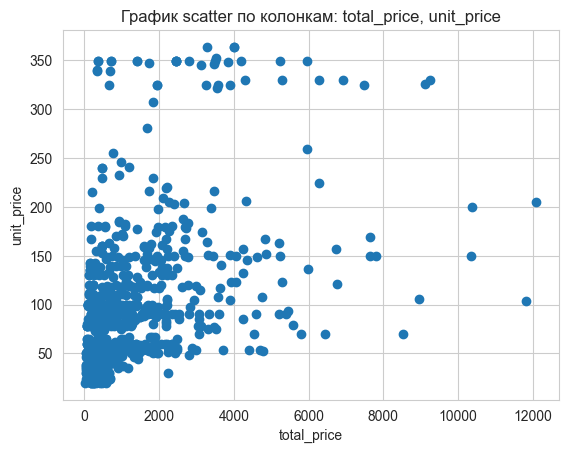

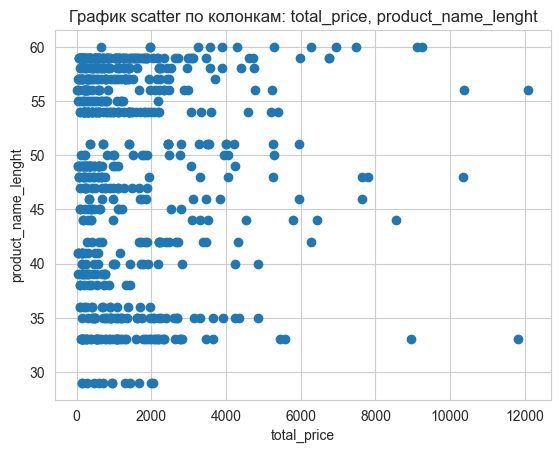

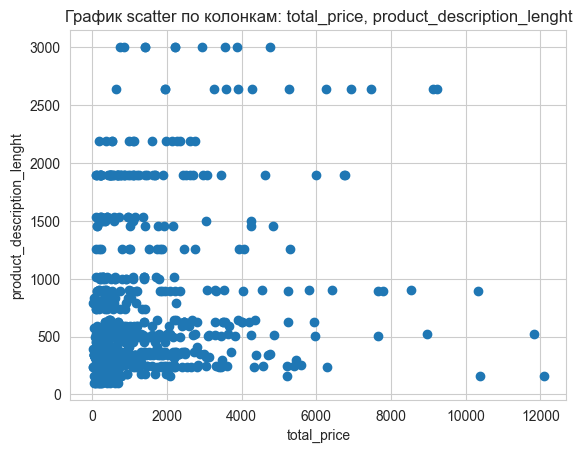

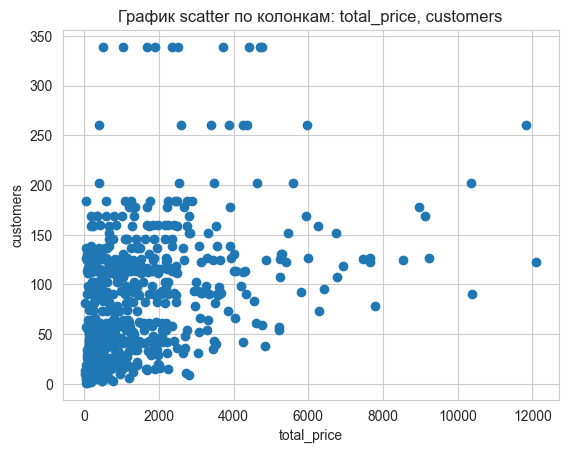

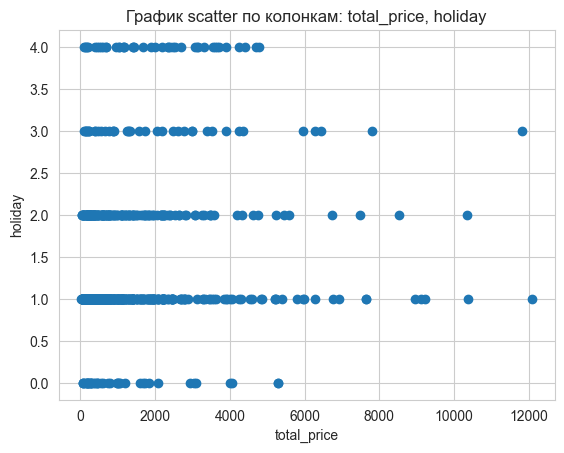

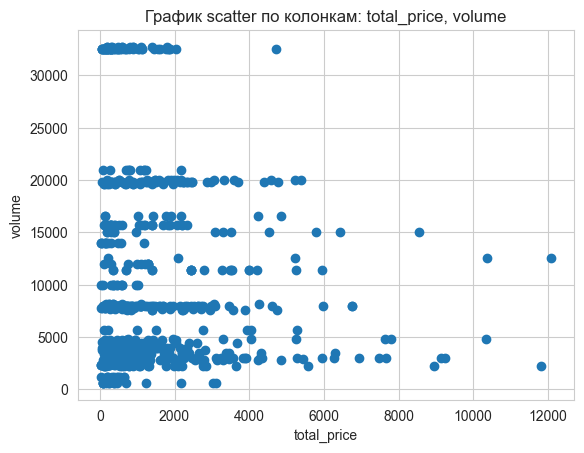

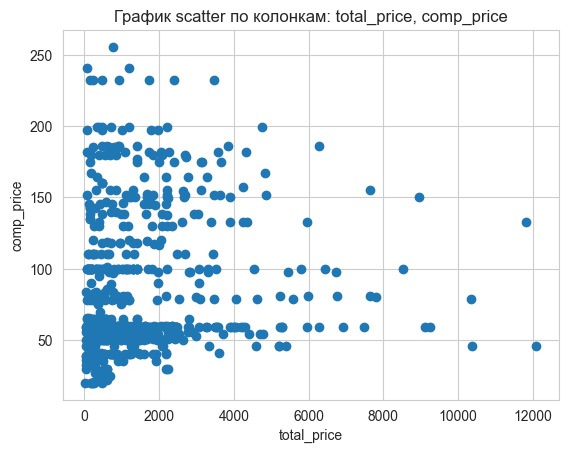

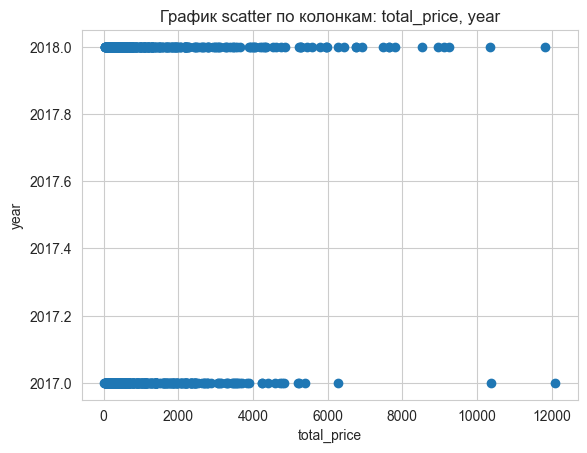

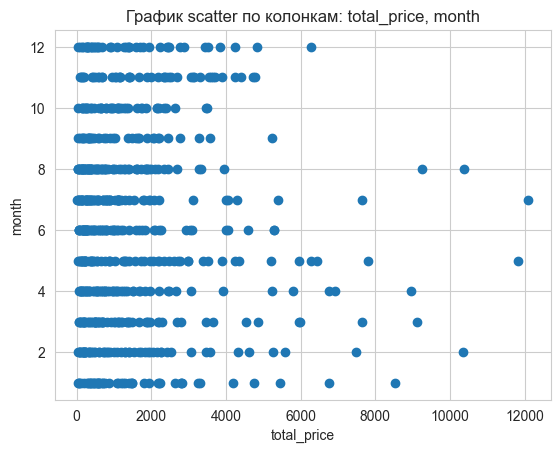

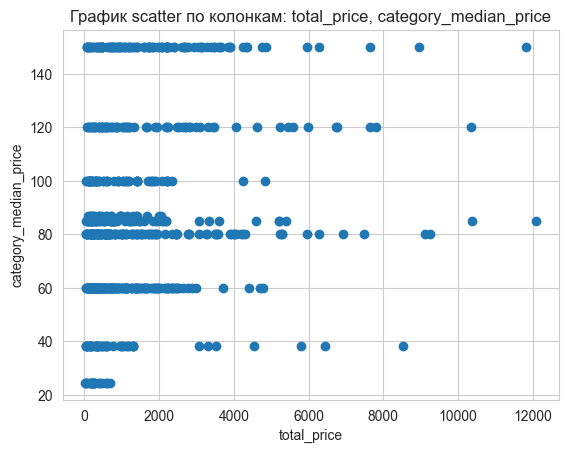

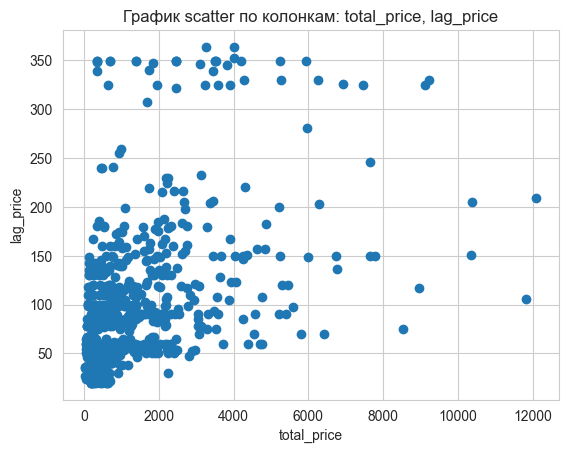

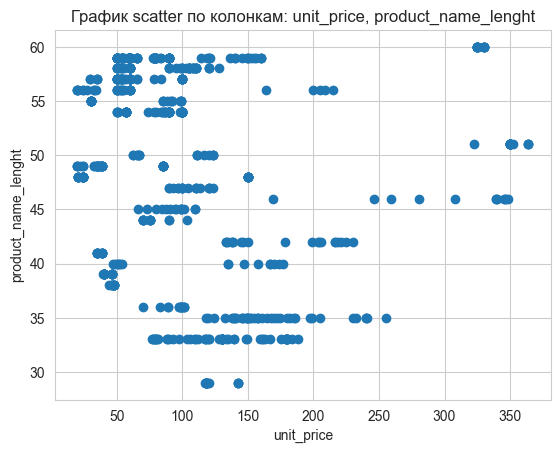

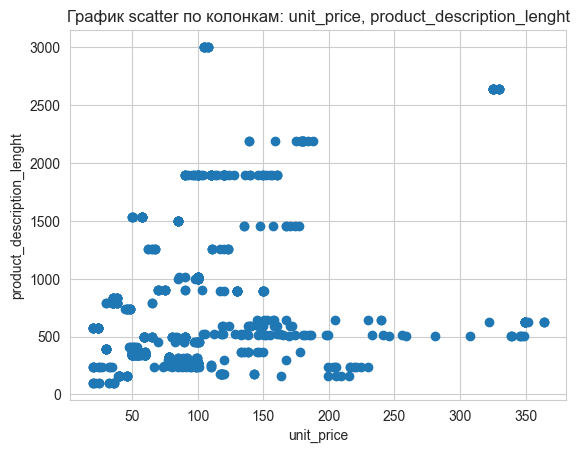

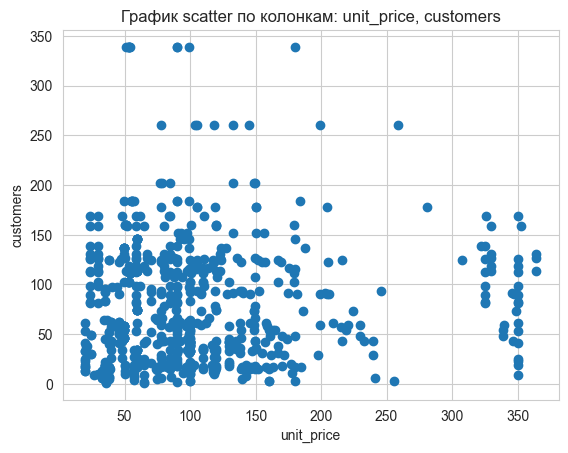

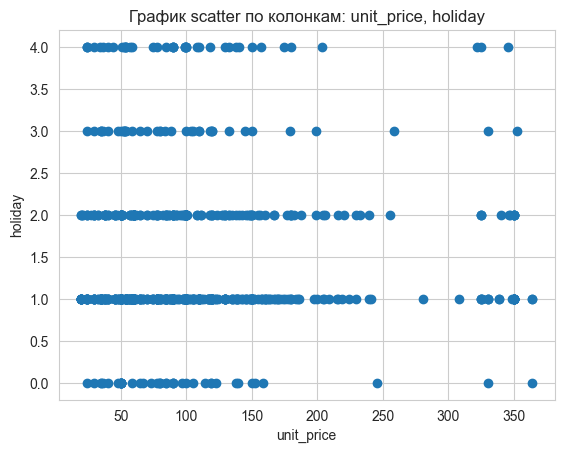

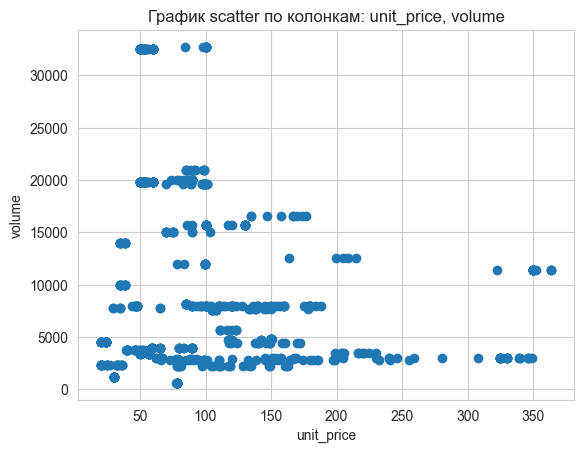

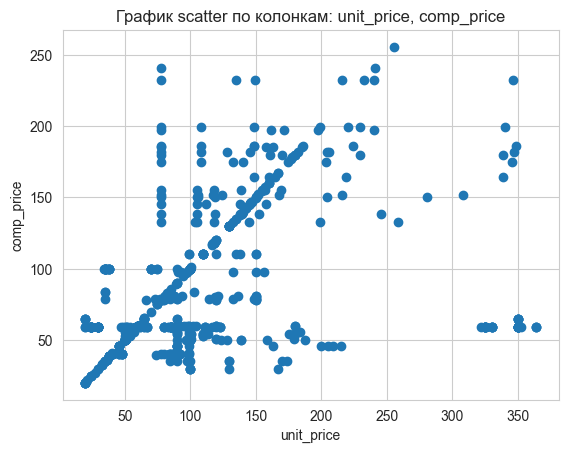

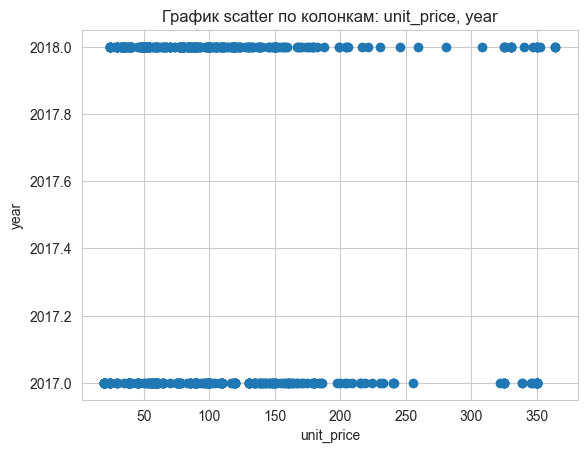

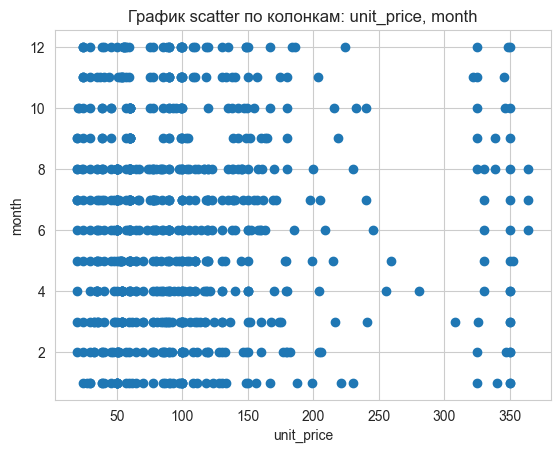

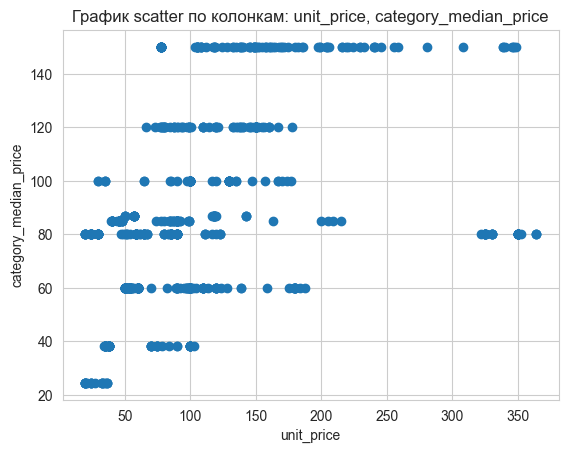

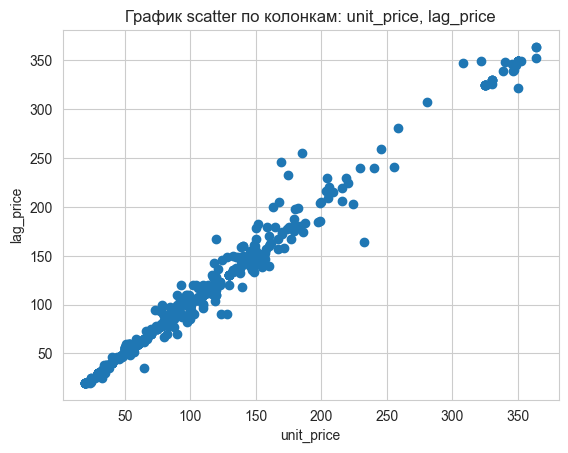

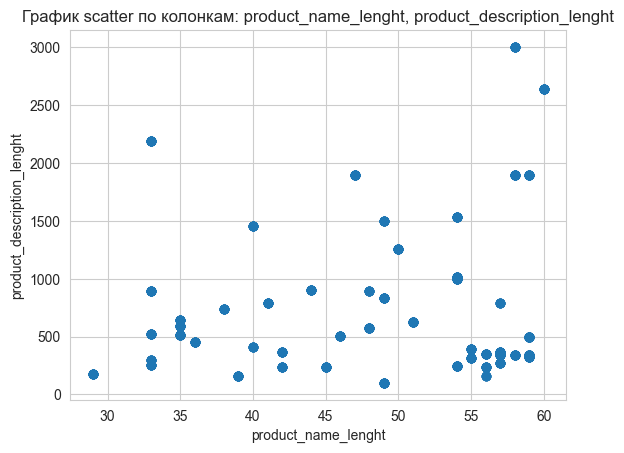

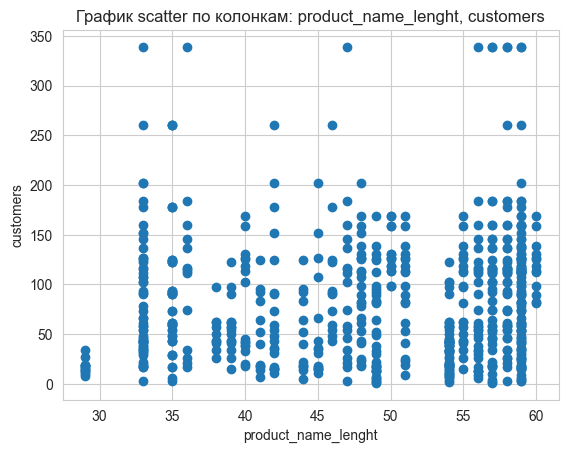

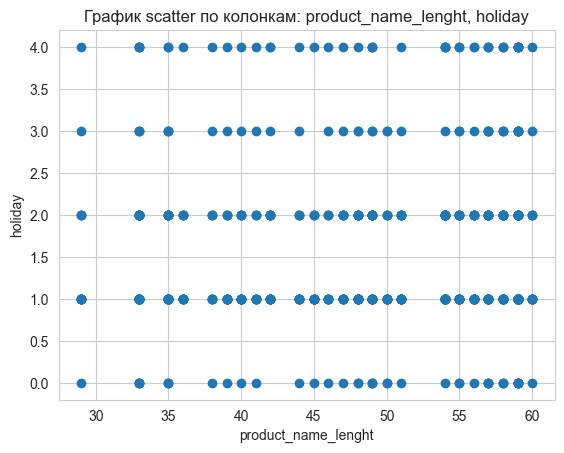

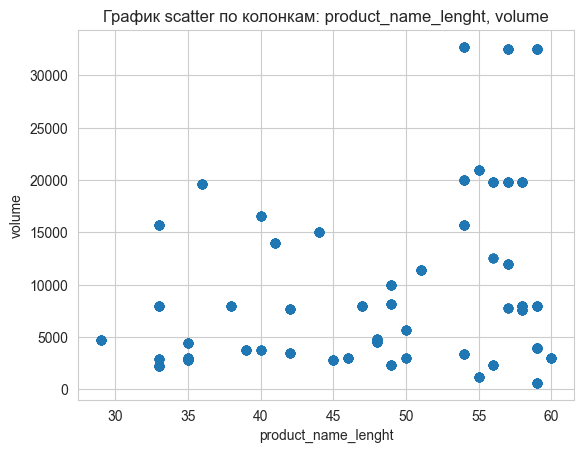

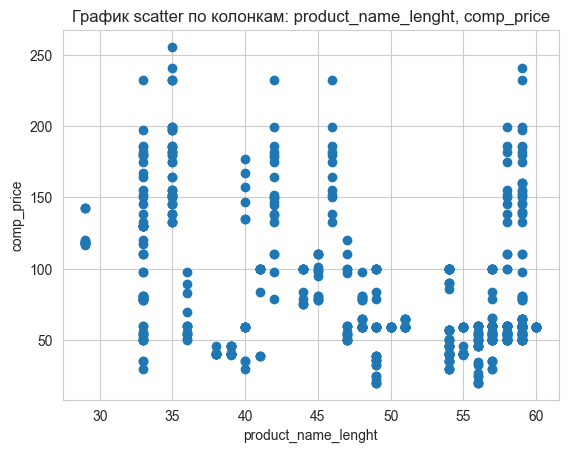

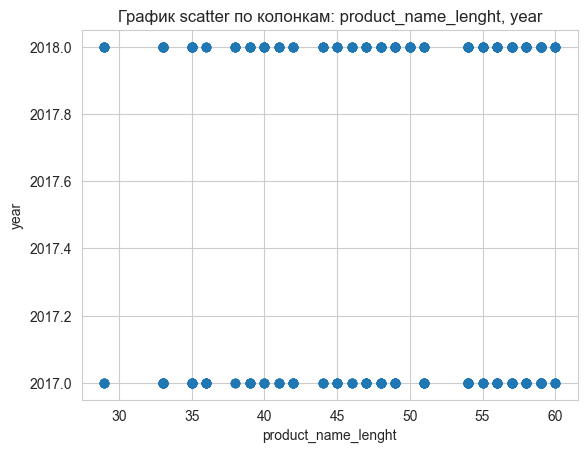

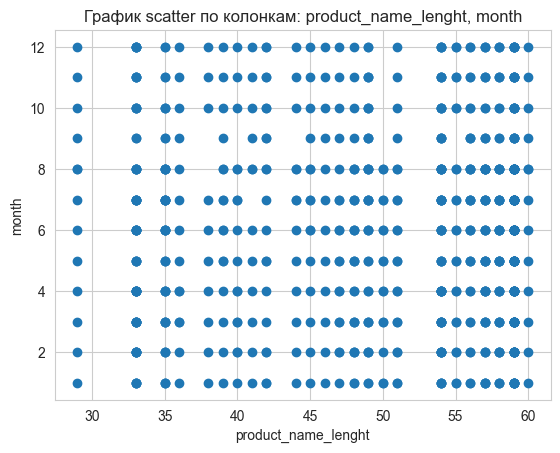

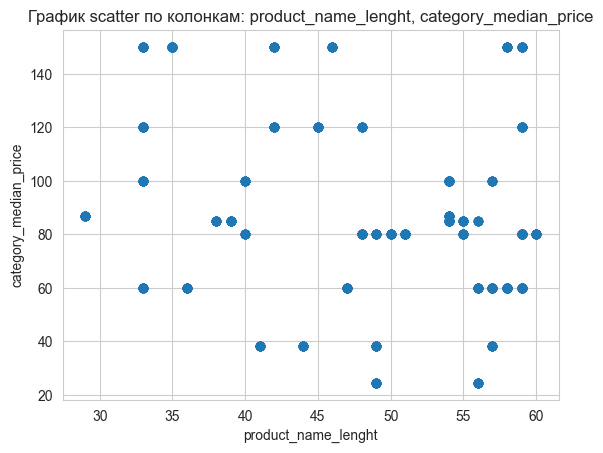

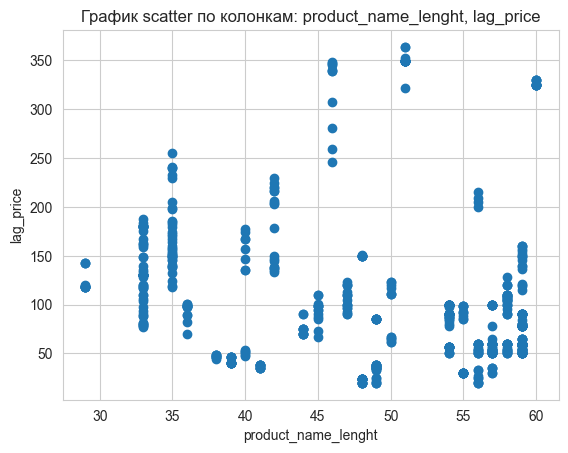

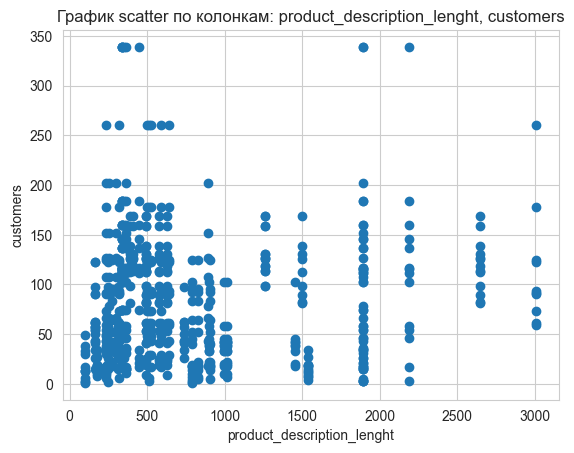

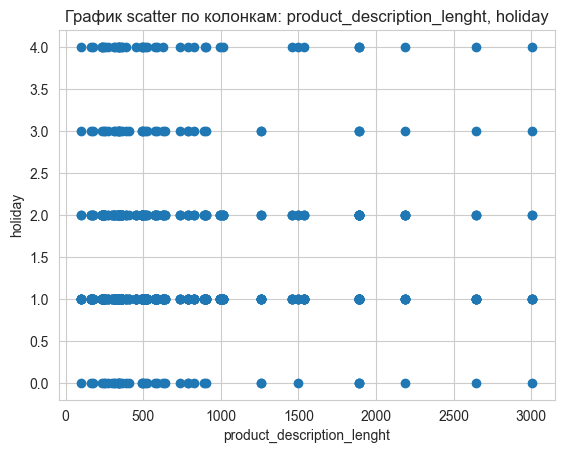

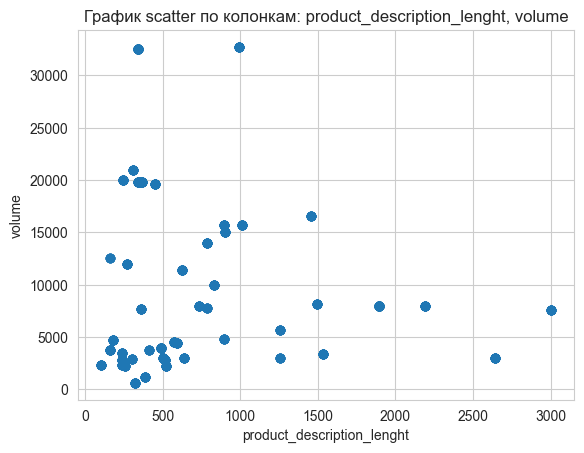

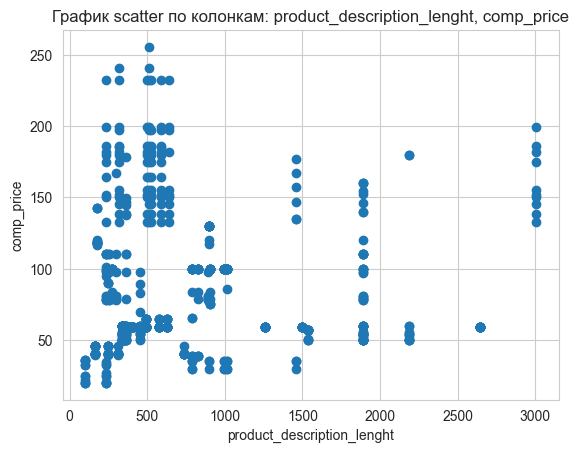

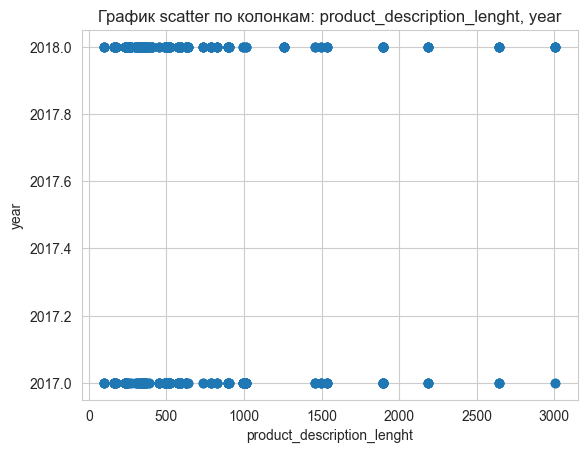

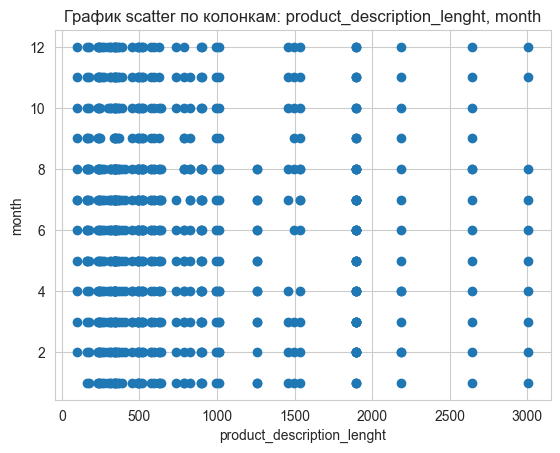

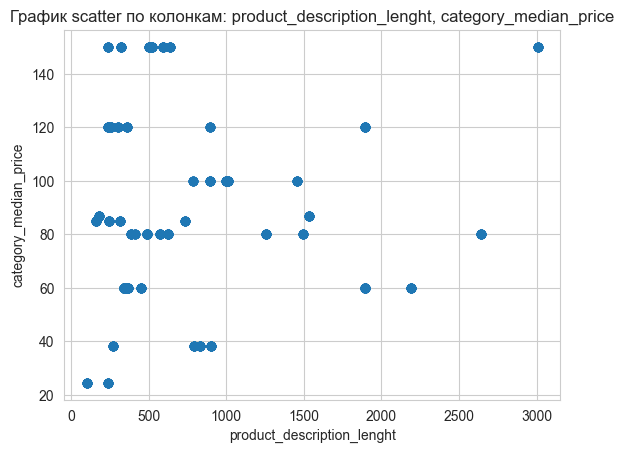

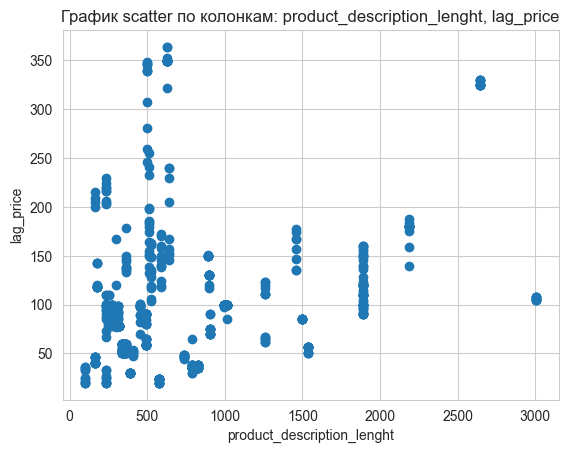

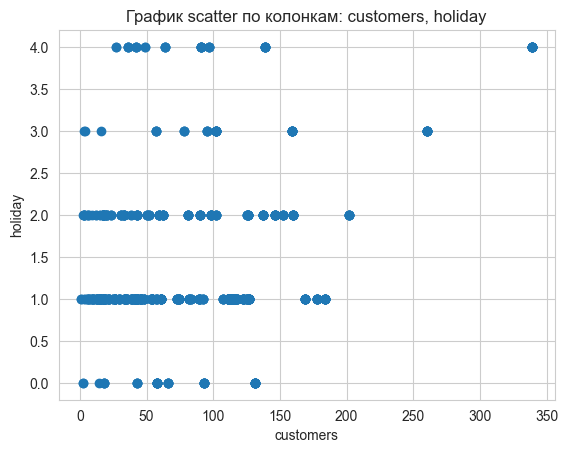

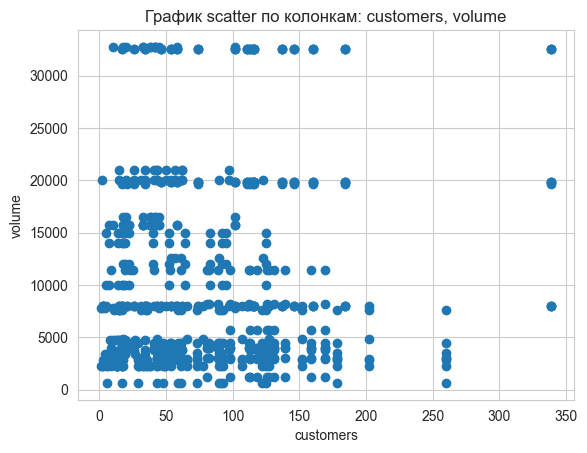

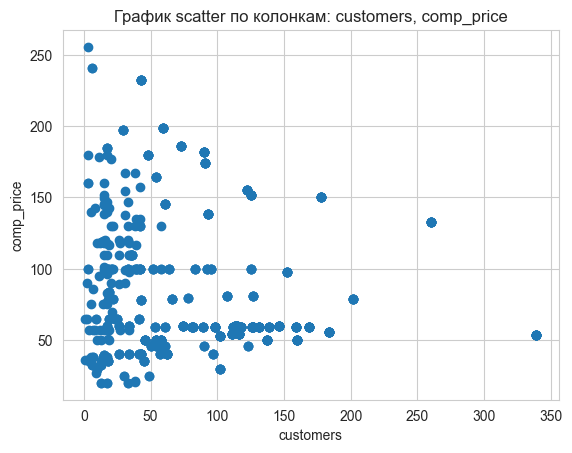

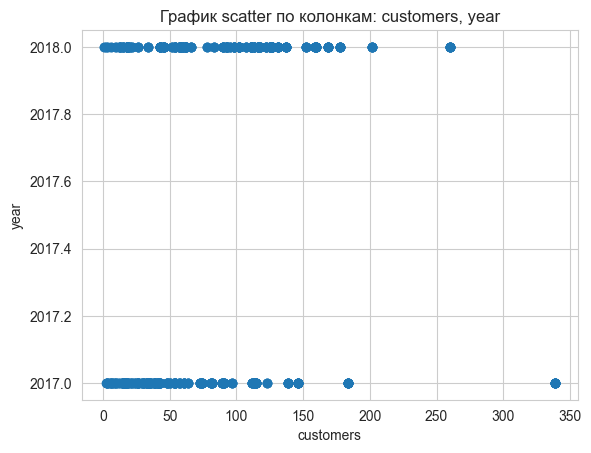

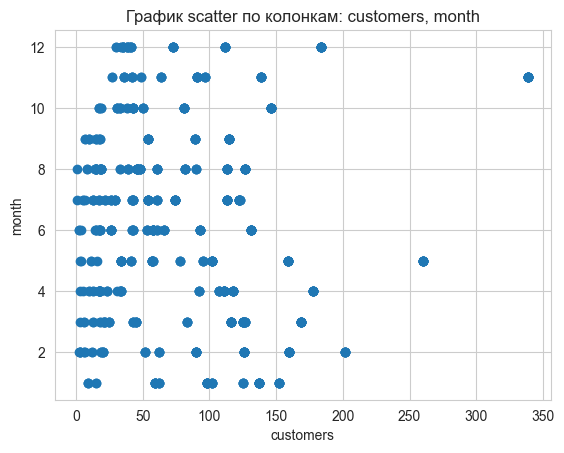

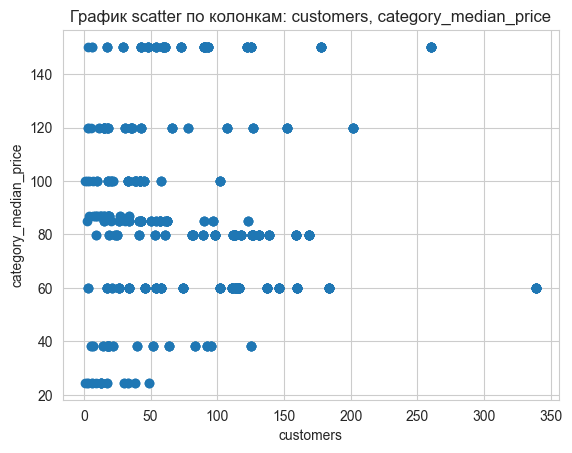

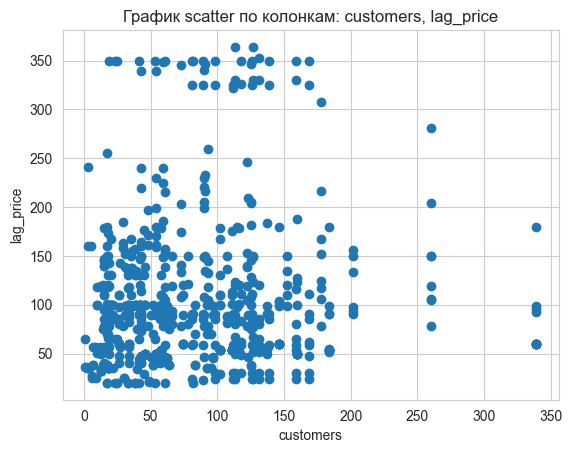

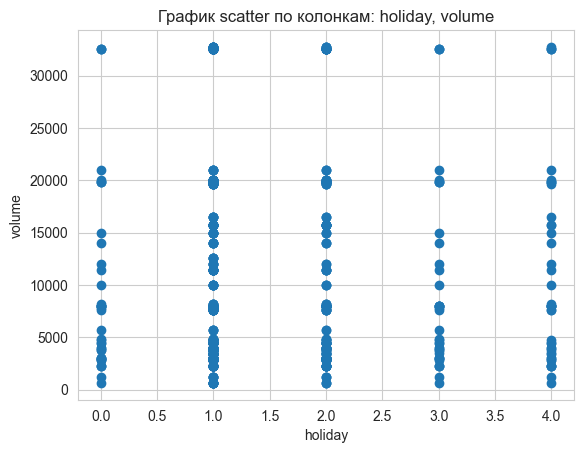

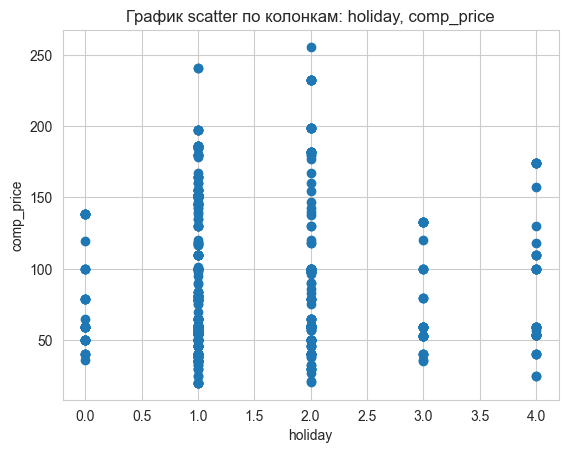

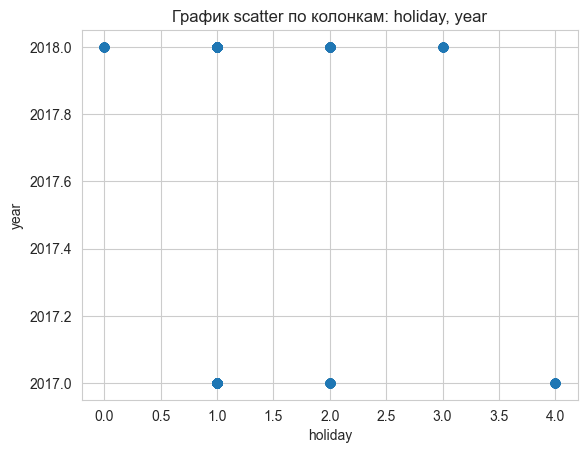

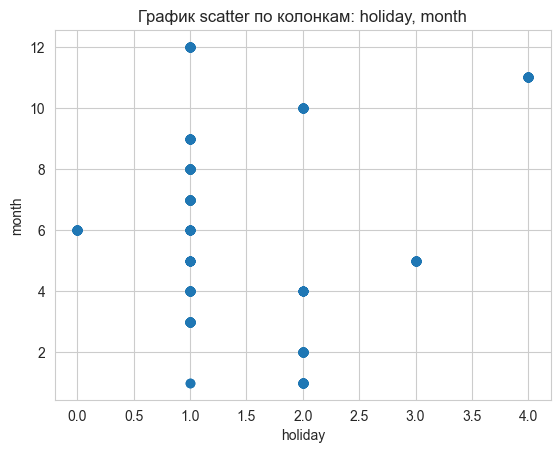

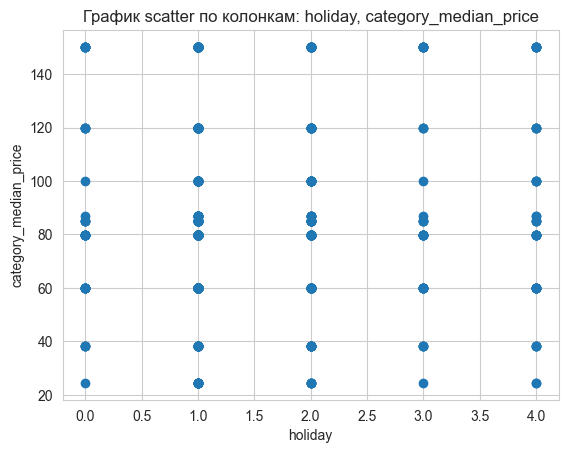

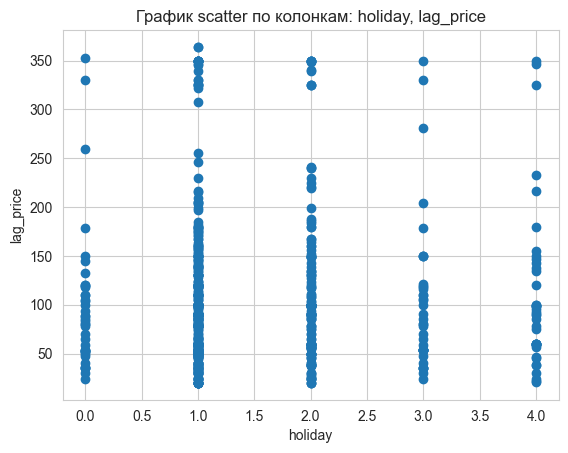

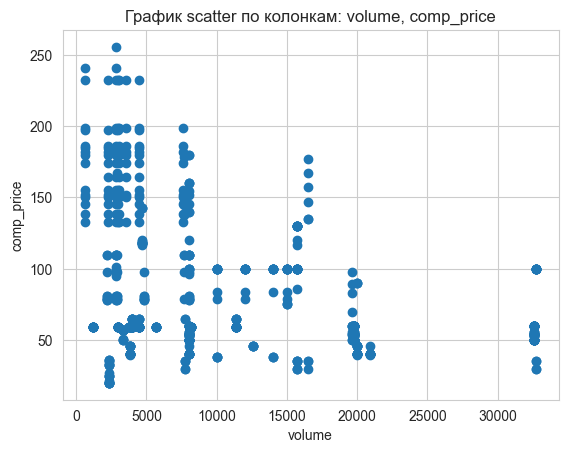

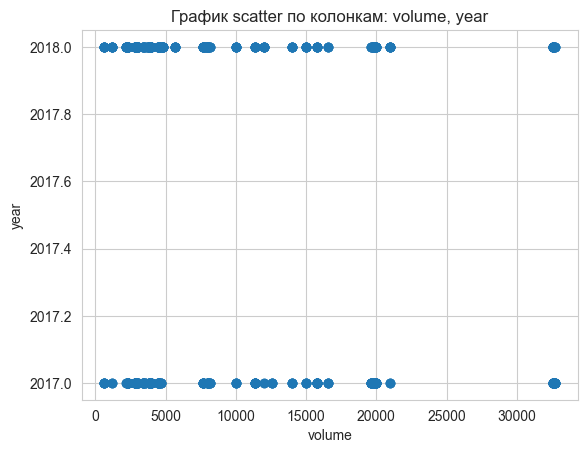

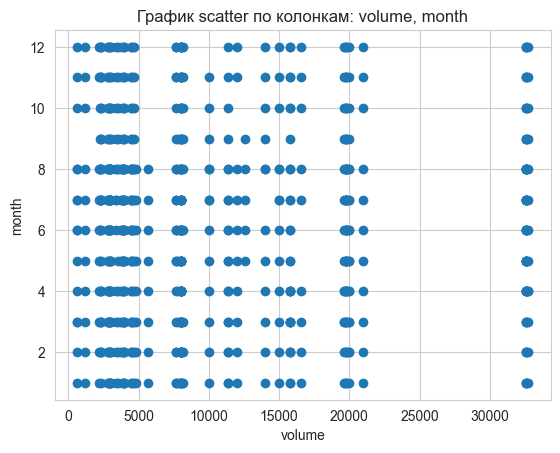

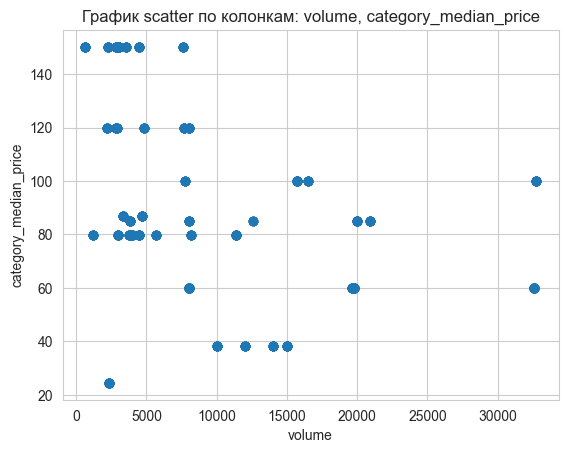

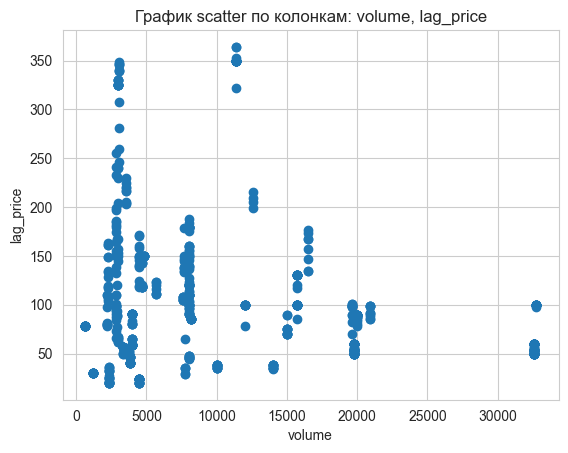

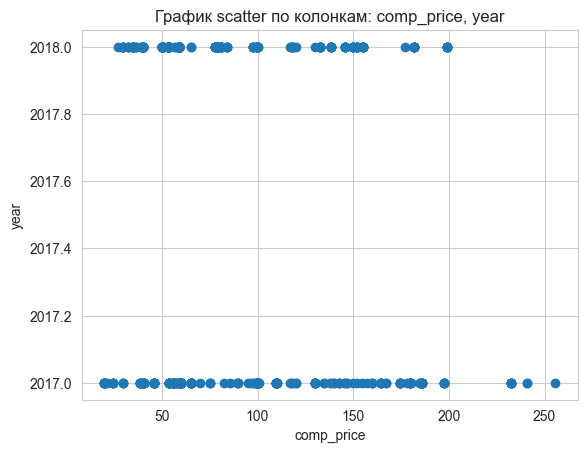

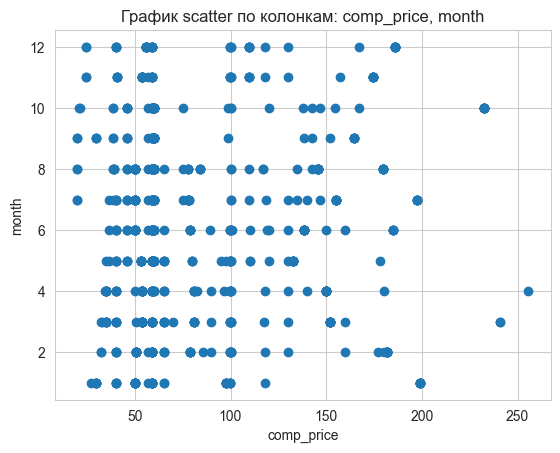

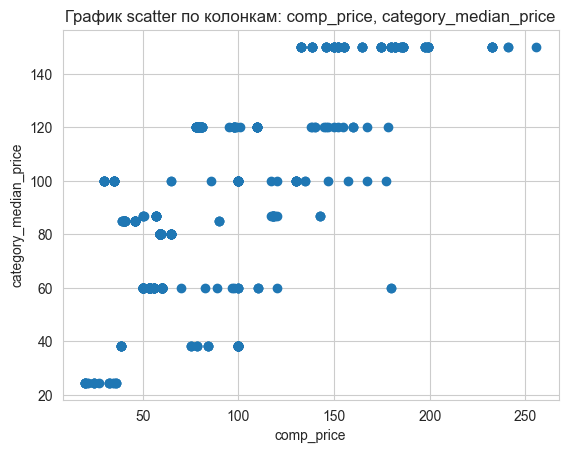

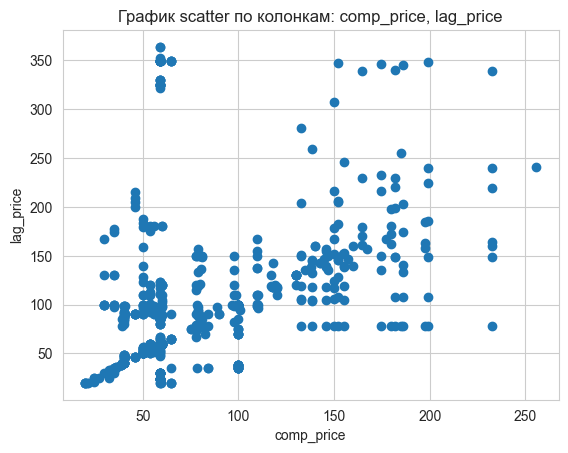

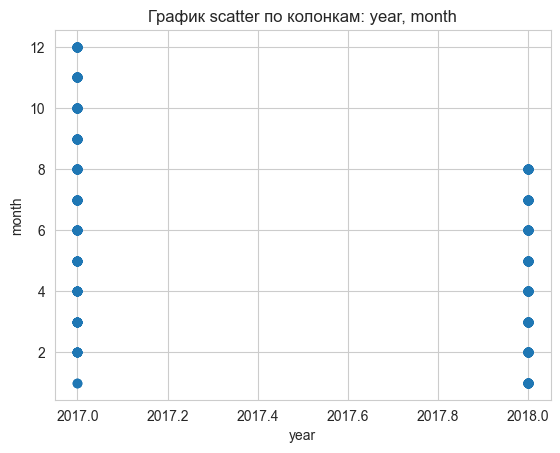

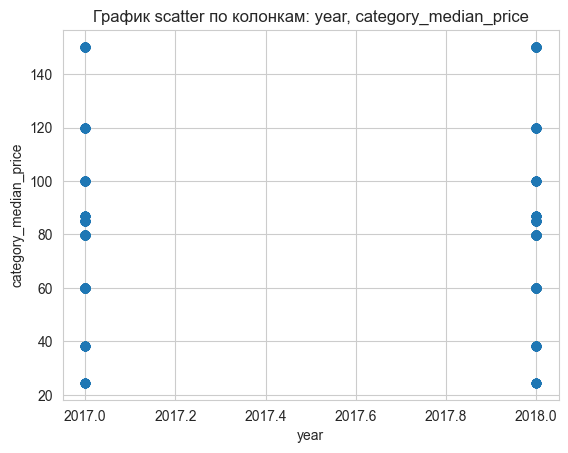

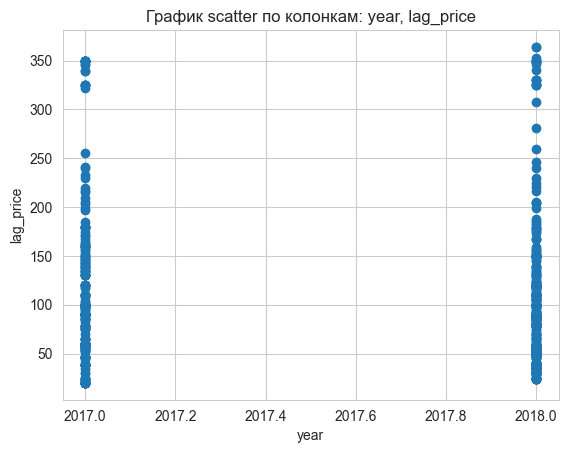

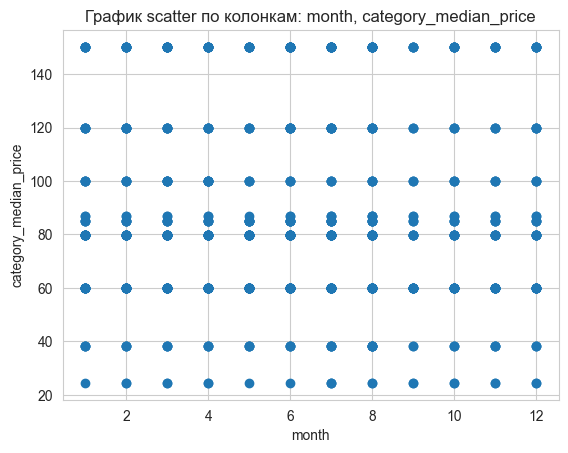

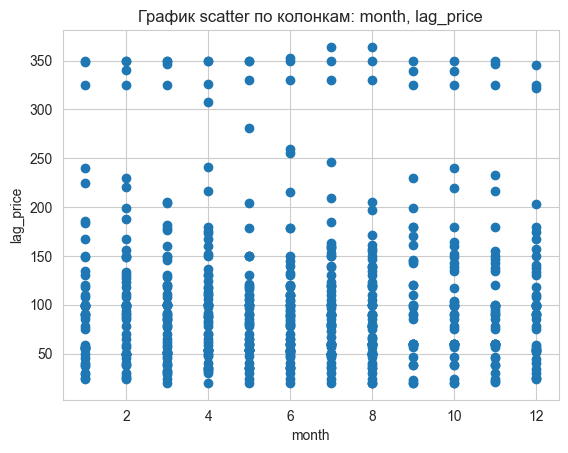

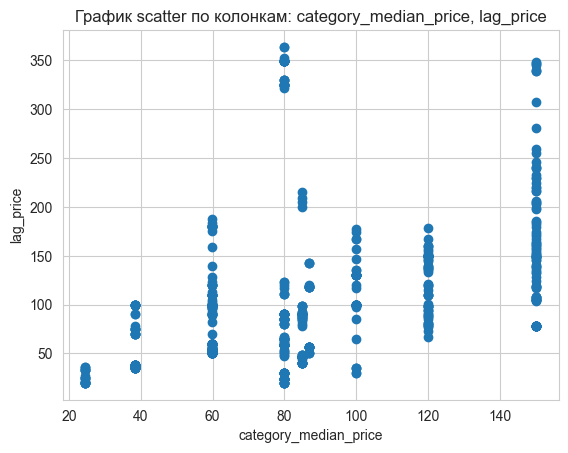

In [60]:
def generate_scatter(data, x, y, title, x_name, y_name):
    plt.scatter(data[x], data[y])
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)
    plt.show()


num_columns = df.select_dtypes(include='number').columns
num_columns = num_columns.drop('Unnamed: 0')

for i in range(len(num_columns)):
    for j in range(i + 1, len(num_columns)):
        generate_scatter(df,
            x=num_columns[i],
            y=num_columns[j],
            title=f'График scatter по колонкам: {num_columns[i]}, {num_columns[j]}',
            x_name=num_columns[i],
            y_name=num_columns[j]
        )



Index(['Unnamed: 0', 'qty', 'total_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'customers', 'holiday', 'volume',
       'comp_price', 'year', 'month', 'category_median_price'],
      dtype='object')


In [37]:
df_new = df.drop(columns=['Unnamed: 0'])
df_new.head()

,item_id,product_category_name,month_year,qty,total_price,unit_price,product_name_lenght,product_description_lenght,customers,holiday,volume,comp_price,year,month,category_median_price,lag_price
0,bed1,bed_bath_table,2017-05-01,1,45.95,45.95,39,161,57,1,3800,45.95,2017,5,84.9,NaN
1,bed1,bed_bath_table,2017-06-01,3,137.85,45.95,39,161,61,1,3800,45.95,2017,6,84.9,45.95
2,bed1,bed_bath_table,2017-07-01,6,275.70,45.95,39,161,123,1,3800,45.95,2017,7,84.9,45.95
3,bed1,bed_bath_table,2017-08-01,4,183.80,45.95,39,161,90,1,3800,45.95,2017,8,84.9,45.95
4,bed1,bed_bath_table,2017-09-01,2,91.90,45.95,39,161,54,1,3800,45.95,2017,9,84.9,45.95


In [38]:
df_new.sort_values(by=['item_id', 'month_year'], inplace=True)
df_new['lag_price'] = df_new.groupby('item_id')['unit_price'].shift(1)

df_new.head(20)

,item_id,product_category_name,month_year,qty,total_price,unit_price,product_name_lenght,product_description_lenght,customers,holiday,volume,comp_price,year,month,category_median_price,lag_price
0,bed1,bed_bath_table,2017-05-01,1,45.95,45.950000,39,161,57,1,3800,45.950000,2017,5,84.9,NaN
1,bed1,bed_bath_table,2017-06-01,3,137.85,45.950000,39,161,61,1,3800,45.950000,2017,6,84.9,45.950000
2,bed1,bed_bath_table,2017-07-01,6,275.70,45.950000,39,161,123,1,3800,45.950000,2017,7,84.9,45.950000
3,bed1,bed_bath_table,2017-08-01,4,183.80,45.950000,39,161,90,1,3800,45.950000,2017,8,84.9,45.950000
4,bed1,bed_bath_table,2017-09-01,2,91.90,45.950000,39,161,54,1,3800,45.950000,2017,9,84.9,45.950000
5,bed1,bed_bath_table,2017-10-01,3,137.85,45.950000,39,161,50,2,3800,45.950000,2017,10,84.9,45.950000
6,bed1,bed_bath_table,2017-11-01,11,445.85,40.531818,39,161,97,4,3800,40.531818,2017,11,84.9,45.950000
7,bed1,bed_bath_table,2017-12-01,6,239.94,39.990000,39,161,41,1,3800,39.990000,2017,12,84.9,40.531818
8,bed1,bed_bath_table,2018-01-01,19,759.81,39.990000,39,161,62,2,3800,39.990000,2018,1,84.9,39.990000
9,bed1,bed_bath_table,2018-02-01,18,719.82,39.990000,39,161,62,2,3800,39.990000,2018,2,84.9,39.990000


In [41]:
df_new['is_price_up'] = (df_new['unit_price'] > df_new['lag_price']).astype(int)

df_new.tail(20)

,item_id,product_category_name,month_year,qty,total_price,unit_price,product_name_lenght,product_description_lenght,customers,holiday,volume,comp_price,year,month,category_median_price,lag_price,is_price_up
603,watches7,watches_gifts,2017-10-01,10,3461.58,346.158000,46,501,43,2,3042,232.490000,2017,10,150.133333,339.000000,1
604,watches7,watches_gifts,2017-11-01,9,3111.36,345.706667,46,501,91,4,3042,174.433333,2017,11,150.133333,346.158000,0
605,watches7,watches_gifts,2017-12-01,11,3836.80,348.800000,46,501,73,1,3042,185.960000,2017,12,150.133333,345.706667,1
606,watches7,watches_gifts,2018-01-01,1,339.90,339.900000,46,501,59,2,3042,199.000000,2018,1,150.133333,348.800000,0
607,watches7,watches_gifts,2018-02-01,5,1735.00,347.000000,46,501,90,2,3042,182.000000,2018,2,150.133333,339.900000,1
608,watches7,watches_gifts,2018-03-01,6,1847.00,307.833333,46,501,125,1,3042,151.878437,2018,3,150.133333,347.000000,0
609,watches7,watches_gifts,2018-04-01,6,1684.00,280.666667,46,501,178,1,3042,150.133333,2018,4,150.133333,307.833333,0
610,watches7,watches_gifts,2018-05-01,23,5956.30,258.969565,46,501,260,3,3042,132.531250,2018,5,150.133333,280.666667,0
611,watches7,watches_gifts,2018-06-01,4,983.60,245.900000,46,501,93,0,3042,138.220000,2018,6,150.133333,258.969565,0
612,watches7,watches_gifts,2018-07-01,45,7651.27,169.349318,46,501,122,1,3042,155.000000,2018,7,150.133333,245.900000,0


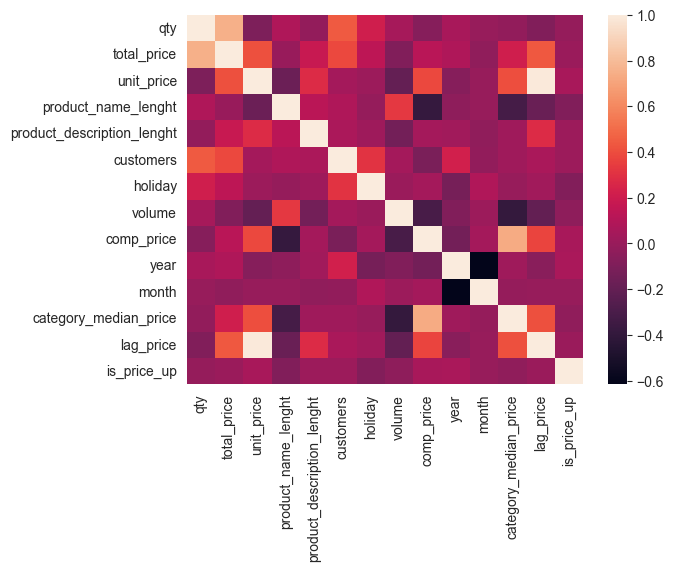

In [46]:
import seaborn as sns

num_columns = df_new.select_dtypes(include='number')

correlation_matrix = num_columns.corr()
sns.heatmap(correlation_matrix)
plt.show()


In [49]:
quantity_by_month = df_new.pivot_table(
    values='qty',
    index='month_year',
    columns='item_id',
    aggfunc='sum'
)
quantity_by_month

item_id,bed1,bed2,bed3,bed4,bed5,computers1,computers2,computers3,computers4,computers5,...,perfumery1,perfumery2,watches1,watches2,watches3,watches4,watches5,watches6,watches7,watches8
month_year,,,,,,,,,,,,,,,,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2017-04-01,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,1.0,58.0,NaN,NaN,1.0,4.0,NaN,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,3.0,51.0,NaN,NaN,10.0,6.0,NaN,15.0,3.0,NaN,...,4.0,NaN,5.0,5.0,3.0,NaN,NaN,4.0,NaN,NaN
2017-07-01,6.0,60.0,NaN,NaN,59.0,10.0,NaN,4.0,6.0,NaN,...,7.0,NaN,10.0,6.0,1.0,NaN,NaN,11.0,NaN,2.0
2017-08-01,4.0,37.0,NaN,NaN,52.0,2.0,NaN,13.0,7.0,NaN,...,7.0,1.0,15.0,5.0,5.0,NaN,8.0,13.0,2.0,NaN
2017-09-01,2.0,23.0,NaN,NaN,32.0,4.0,NaN,12.0,11.0,NaN,...,17.0,1.0,20.0,10.0,NaN,NaN,10.0,18.0,1.0,NaN


NaN - 0 товаров продано

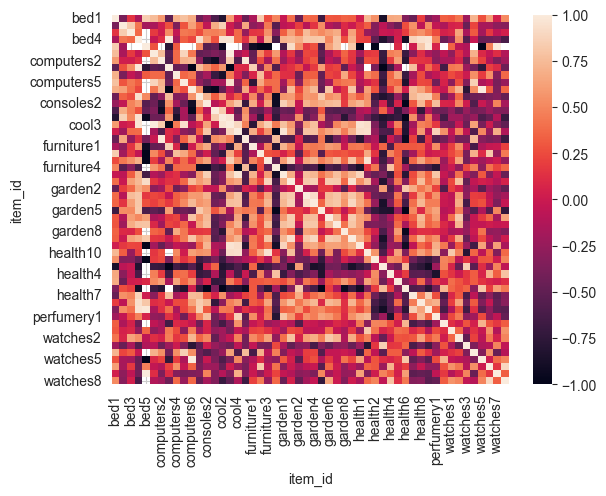

In [51]:
sales_correlation = quantity_by_month.corr()
sns.heatmap(sales_correlation)
plt.show()

In [54]:
high_corr = []
for i in range(len(sales_correlation.columns)):
    for j in range(i+1, len(sales_correlation.columns)):
        if abs(sales_correlation.iloc[i, j]) > 0.9:
            high_corr.append((
                sales_correlation.columns[i],
                sales_correlation.columns[j],
                sales_correlation.iloc[i, j]
            ))

# Выводим список высоких корреляций
print(high_corr)

[('bed4', 'computers3', 0.9864084110591101), ('bed4', 'consoles1', 0.9307293223522605), ('bed4', 'cool2', 0.9558941390146227), ('bed4', 'cool3', 0.9614295779820982), ('bed4', 'health8', 0.9357636224898903), ('bed4', 'health9', 0.954743069528599), ('bed5', 'cool2', -0.9465795049390484), ('bed5', 'furniture1', -0.9100819098543689), ('bed5', 'furniture2', -1.0), ('bed5', 'furniture3', -1.0), ('bed5', 'garden10', 0.9141705920071073), ('bed5', 'health1', -1.0), ('bed5', 'health2', -1.0), ('bed5', 'health9', 0.9769259053505005), ('bed5', 'watches5', -1.0), ('bed5', 'watches7', 1.0), ('computers1', 'cool3', 0.9949003333052607), ('computers2', 'cool1', -0.9213645771221752), ('computers2', 'cool5', 0.9776403323218643), ('computers3', 'computers6', -1.0), ('computers3', 'cool3', -1.0), ('computers3', 'health3', -1.0), ('computers5', 'cool3', 0.9425482584877666), ('computers6', 'consoles2', -0.9031309827778256), ('computers6', 'cool1', -0.9637499002786613), ('computers6', 'watches5', 0.9966264084

In [55]:
high_corr_new = [f"{col1} - {col2}: {corr:.2f}" for col1, col2, corr in high_corr]

for s in high_corr_new:
    print(s)


bed4 - computers3: 0.99
bed4 - consoles1: 0.93
bed4 - cool2: 0.96
bed4 - cool3: 0.96
bed4 - health8: 0.94
bed4 - health9: 0.95
bed5 - cool2: -0.95
bed5 - furniture1: -0.91
bed5 - furniture2: -1.00
bed5 - furniture3: -1.00
bed5 - garden10: 0.91
bed5 - health1: -1.00
bed5 - health2: -1.00
bed5 - health9: 0.98
bed5 - watches5: -1.00
bed5 - watches7: 1.00
computers1 - cool3: 0.99
computers2 - cool1: -0.92
computers2 - cool5: 0.98
computers3 - computers6: -1.00
computers3 - cool3: -1.00
computers3 - health3: -1.00
computers5 - cool3: 0.94
computers6 - consoles2: -0.90
computers6 - cool1: -0.96
computers6 - watches5: 1.00
consoles1 - furniture4: -0.91
consoles2 - furniture4: -0.93
consoles2 - health6: -1.00
cool2 - cool3: 0.95
cool2 - health6: -0.99
cool3 - health1: 0.96
cool3 - health10: 0.92
cool4 - furniture4: -0.96
cool4 - garden1: 0.96
cool4 - health1: 0.93
cool4 - health10: 0.94
cool5 - health6: -0.93
furniture3 - health10: 0.95
furniture4 - garden1: -0.90
furniture4 - garden5: -0.96
g

Сверху пары товаров, продажи которых коррелируют

Зависимость длины названия продукта от длины его описания :)

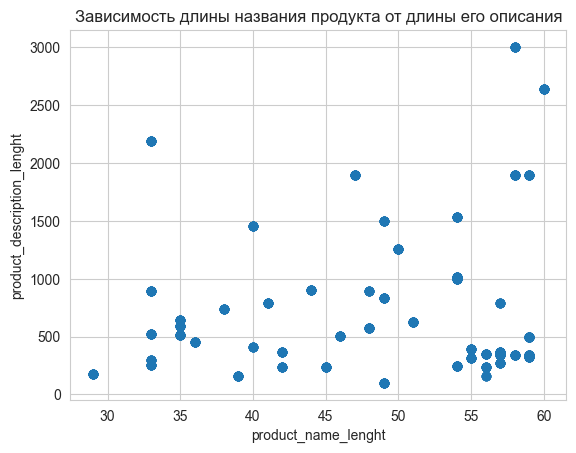

In [61]:
plt.scatter(df_new['product_name_lenght'], df_new['product_description_lenght'])
plt.title('Зависимость длины названия продукта от длины его описания')
plt.xlabel('product_name_lenght')
plt.ylabel('product_description_lenght')
plt.show()


In [63]:
from scipy.stats import pearsonr

name_length = df_new['product_name_lenght']
description_length = df_new['product_description_lenght']

pearson_corr, pearson_p_value = pearsonr(name_length, description_length)

print(f"Коэф корреляции Пирсона: {pearson_corr}, p-value: {pearson_p_value}")

Коэф корреляции Пирсона: 0.12451009584793454, p-value: 0.0011790406408799957


### Задача 4. Построение модели / dash (15 баллов)

Постройте модель линейной регрессии для предсказания переменной qty.

1. Подобные данные не совсем правильно делить случайным образом. Оставьте на тест наблюдения с 01.06.2018. Вся история до этого будет обучающей выборкой. Создайте датасеты train и test. **(1 балл)**
2. Обучите линейную регрессию из sklearn на всех числовых переменных. Не забудьте удалить переменные customers, total_price и саму переменную qty.

 **(3 балла)** Посчитайте значение метрик MSE, RMSE на обучающей и тестовой выборке. **(2 балла)**
3. Закодируйте переменную product_category_name методом one-hot-encoding. **(3 балла)** Обучите модель еще раз, посчитайте метрики. **(1 балл)**
4. **(5 баллов)**
Выберите один из вариантов задания.

**Вариант 1 (улучшаем модель)**

Попробуйте увеличить точность модели любым способом (но использовать другие модели, кроме линейной регрессии, запрещается). Можно:
- исправлять ошибки в данных, если вы их найдете
- удалять выбросы
- удалять нерелевантные признаки
- генерировать новые признаки
- нормализовывать данные
- делать признаки из "лагов" продаж, например, использовать в качестве признака продажи три месяца назад. Обратите внимание, что при этом надо избегать data leak. Т.к. вам нужно предсказать продажи с 01.06.2018, считайте, что сейчас 31.05.2018, и продаж после этой даты вы не знаете.
- ...


Напишите развернутые комментарии к экспериментам.
Сделайте выводы.

**Вариант 2 (dash)**


С помощью библиотеки dash постройте интерактивный график, где по оси X - дата, по оси Y - количество проданных штук.
Сделайте фильтры:
- по категориям
- по товарам
- по цене (пользователь может вводить минимум и максимум)

Можете выбрать другой график и другие фильтры.

При наведении на точку должна показываться информация о всех полях из датасета.


### Git (5 баллов)

Внезапная коллаборация с курсом Инструменты разработки!

**Сдайте ДЗ в git clasroom до мягкого дедлайна.** Ссылка на задание - https://classroom.github.com/a/pdYJ_rdp

Перейдите по ней со своего github аккаунта и выберите себя в списке студентов. Если Вас нет в списке, напишите преподавателю.

Прикрепите ipynb файл в репозиторий.

Вы можете прикрепить ДЗ в anytask, как обычно. В этом случае максимальная оценка за ДЗ - 95 баллов.